In [5]:
import numpy as np

In [6]:
import pandas as pd

# HR Employee Attrition Analysis

The following code imports the pandas library and loads the employee attrition dataset
from a CSV file called 'Python Final Project.csv' into a DataFrame named employee_attrition.
This DataFrame will be used for further analysis of employee attrition patterns.


In [7]:
import pandas as pd

employee_attrition = pd.read_csv("Python Final Project.csv")
employee_attrition

,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,...,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber.1
0,1,2,Female,94,3,2,Sales Executive,4,Single,5993,...,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1
1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,...,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2
2,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,...,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4
3,5,4,Female,56,3,1,Research Scientist,3,Married,2909,...,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5
4,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,...,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,...,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061
1466,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,...,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062
1467,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,...,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064
1468,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,...,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065


The following code cell is used to display a concise summary of the DataFrame, 
including the column data types, non-null counts, and memory usage. 

This helps to identify potential missing data and understand the general structure of the dataset.


In [8]:
employee_attrition.info() #checking data info to understand if there is missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            1470 non-null   int64 
 1   EnvironmentSatisfaction   1470 non-null   int64 
 2   Gender                    1470 non-null   object
 3   HourlyRate                1470 non-null   int64 
 4   JobInvolvement            1470 non-null   int64 
 5   JobLevel                  1470 non-null   int64 
 6   JobRole                   1470 non-null   object
 7   JobSatisfaction           1470 non-null   int64 
 8   MaritalStatus             1470 non-null   object
 9   MonthlyIncome             1470 non-null   int64 
 10  MonthlyRate               1470 non-null   int64 
 11  NumCompaniesWorked        1470 non-null   int64 
 12  Over18                    1470 non-null   object
 13  OverTime                  1470 non-null   object
 14  PercentSalaryHike       

The following code cell displays the number of unique values for each column in the employee_attrition DataFrame.

This helps to understand the categorical variety and potential cardinality of each feature in the dataset.


In [9]:
employee_attrition.nunique()

EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department

### **1st KPI: Attrition Trends and Patterns (by attrition rate):**

This KPI measures the overall employee attrition rate in the company.
It calculates the percentage of employees who left ("Attrition = Yes") out of all employees.
By knowing the attrition rate, we get a quick insight into how many employees are leaving the organization.
A high attrition rate can be a warning sign that may indicate possible employee dissatisfaction, issues in work environment, or other organizational problems.

Monitoring this KPI helps the company identify trends and, if needed, take action to improve employee retention.


**Number of employees who left:**

In [10]:
# Identify overall attrition rates across the company:
# The problem is that ['Attrition'] == 'Yes' returns a boolean Series and is being used incorrectly as a column label.
# To filter rows where Attrition == 'Yes', you should do:
employee_who_left = employee_attrition.loc[employee_attrition['Attrition'] == 'Yes', ('Attrition')].count()
employee_who_left 

np.int64(237)

**Number of employees who stayed:**

In [11]:
employee_attrition.loc[employee_attrition['Attrition'] == 'No', ['Attrition']].count()

Attrition    1233
dtype: int64

**Attrition rate by formula:** 

(employee_who_left/total employees)*100

In [12]:
Attrition_Rate = ((employee_who_left / 1470) * 100).round(2)
print("Attrition rate is:", Attrition_Rate, "%")

Attrition rate is: 16.12 %


The pie chart below visualizes the overall employee attrition rate in the company.

This quick graphical summary allows us to understand the proportion of 
employee turnover at a glance, 
highlighting potential retention issues or overall organizational stability.


**Pie Chart of Attrition Rate**

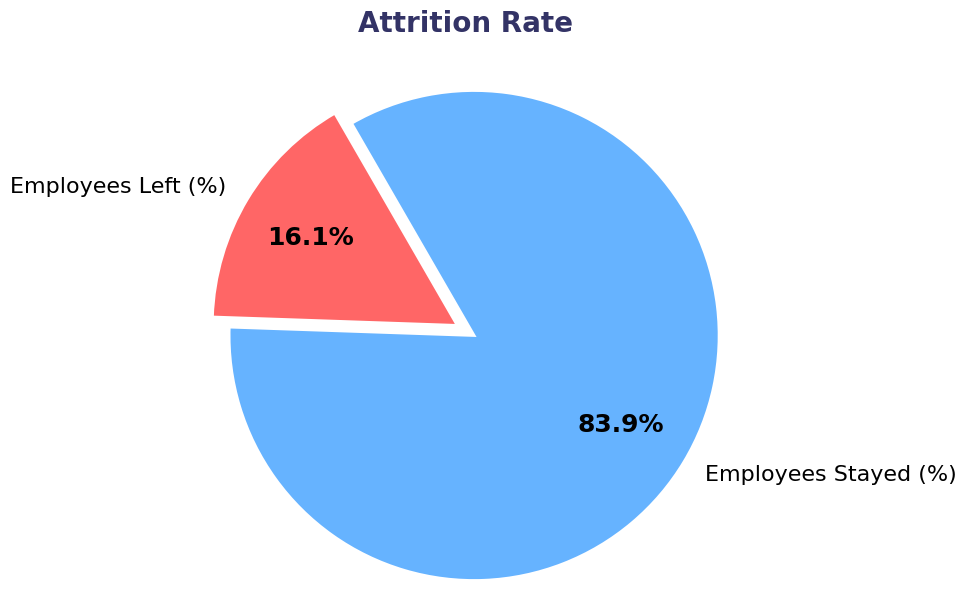

In [13]:
Attrition_Rate = ((employee_who_left / 1470) * 100).round(2)
import matplotlib.pyplot as plt

# יצירת גרף פאי מרהיב המשקף את שיעור העזיבה
sizes = [Attrition_Rate, 100 - Attrition_Rate]
labels = ['עובדים שעזבו (%)', 'עובדים נשארו (%)']
colors = ['#FF6666', '#66B3FF']
explode = (0.08, 0)  # הדגשת נתח העוזבים

fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=['Employees Left (%)', 'Employees Stayed (%)'],
    autopct='%1.1f%%',
    startangle=120,
    colors=colors,
    explode=explode,
    pctdistance=0.7,
    textprops={'fontsize':16, 'color':'black'},
    wedgeprops={'edgecolor':'white', 'linewidth':2}
)
# Set the chart title in English instead of Hebrew
plt.title('Employee Attrition Rate in the Organization', fontsize=20, fontweight='bold', color='#333366', pad=25)

# עיצוב כותרת
plt.title('Attrition Rate', fontsize=20, fontweight='bold', color='#333366', pad=25)
plt.setp(autotexts, size=18, fontweight='bold')
plt.setp(texts, size=16)

# הסרת הצירים לעיצוב נקי
ax.axis('equal')

plt.show()

**Quick Insights for HR from the Attrition Pie Chart:**

The 16.1% attrition rate (assuming this is an annual rate) is generally considered moderate, average yearly attrition rates often range from 10% to 20%. 

It may warrant attention, but isn’t alarmingly high unless company or industry norms are lower.

**Tips:**

Conduct exit interviews to spot patterns.
Improve engagement and recognize achievements.
Review pay, benefits, and provide growth opportunities.
Promote a healthy work-life balance.
Addressing these areas can help reduce future employee turnover.



**Years as an Employee at the Company:**


In [14]:
# The avg time where an employee left the comapny in each department:
(employee_attrition[employee_attrition['Attrition'] == 'Yes']
.groupby('Department')['YearsAtCompany'].mean().round(1))

Department
Human Resources           4.2
Research & Development    5.0
Sales                     5.5
Name: YearsAtCompany, dtype: float64

The bar chart below shows the average number of years that employees who left the company had spent at the company, broken down by department.


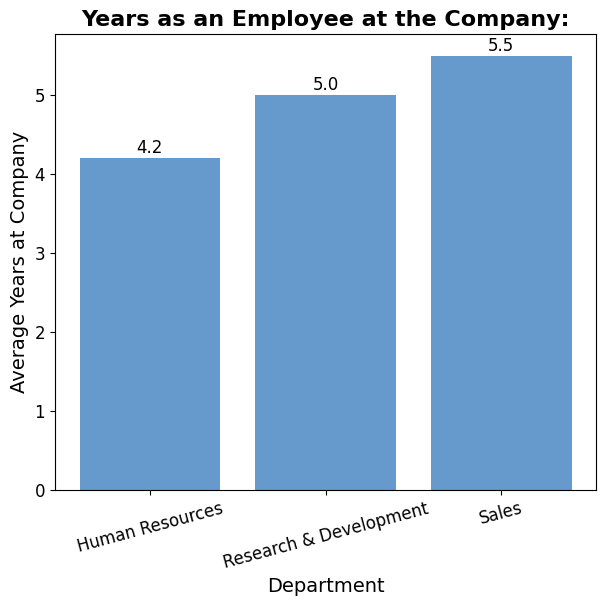

In [15]:
# Bar chart of average years at company by department for employees who left
import matplotlib.pyplot as plt

avg_years_left = (employee_attrition[employee_attrition['Attrition'] == 'Yes']
                  .groupby('Department')['YearsAtCompany']
                  .mean()
                  .round(1))

fig, ax = plt.subplots(figsize=(6, 6))
bars = ax.bar(avg_years_left.index, avg_years_left.values, color='#6699CC')  # single tone color

ax.set_title("Years as an Employee at the Company:", fontsize=16, fontweight='bold')
ax.set_xlabel('Department', fontsize=14)
ax.set_ylabel('Average Years at Company', fontsize=14)
ax.bar_label(bars, fmt='%.1f', padding=1, fontsize=12)
plt.xticks(rotation=15, ha='center', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout(pad=0.5)
plt.show()



**Job Satisfaction for Employees who Left:**

In [16]:
(employee_attrition[employee_attrition['Attrition'] == 'Yes']
.groupby('Department')['JobSatisfaction'].mean().round(1))

Department
Human Resources           2.2
Research & Development    2.5
Sales                     2.5
Name: JobSatisfaction, dtype: float64

The bar chart below displays the average job satisfaction scores of employees who left the company, separated by department


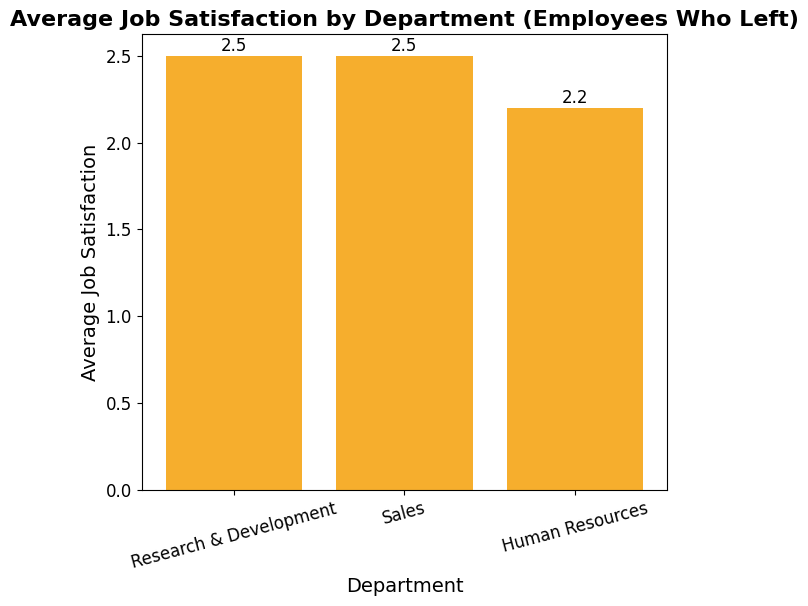

In [17]:
# Calculate average job satisfaction by department for employees who left
avg_job_satisfaction_left = (
    employee_attrition[employee_attrition['Attrition'] == 'Yes']
    .groupby('Department')['JobSatisfaction']
    .mean()
    .round(1)
)

# Sort the results in descending order
sorted_avg_job_satisfaction_left = avg_job_satisfaction_left.sort_values(ascending=False)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(6, 6))
bars = ax.bar(sorted_avg_job_satisfaction_left.index, sorted_avg_job_satisfaction_left.values, color='#F6AE2D')

ax.set_title("Average Job Satisfaction by Department (Employees Who Left)", fontsize=16, fontweight='bold')
ax.set_xlabel('Department', fontsize=14)
ax.set_ylabel('Average Job Satisfaction', fontsize=14)
ax.bar_label(bars, fmt='%.1f', padding=1, fontsize=12)
plt.xticks(rotation=15, ha='center', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout(pad=0.5)
plt.show()


**Percent Salary Hike for Employees who left:**

In [18]:
(employee_attrition[employee_attrition['Attrition'] == 'No']
.groupby('Department')['PercentSalaryHike'].mean().round(1))

Department
Human Resources           15.0
Research & Development    15.3
Sales                     15.1
Name: PercentSalaryHike, dtype: float64

In [19]:
(employee_attrition[employee_attrition['Attrition'] == 'Yes']
.groupby('Department')['PercentSalaryHike'].mean().round(1))

Department
Human Resources           13.8
Research & Development    15.3
Sales                     15.0
Name: PercentSalaryHike, dtype: float64

Bar Chart displaying the average percent salary hike for employees who left, by department.




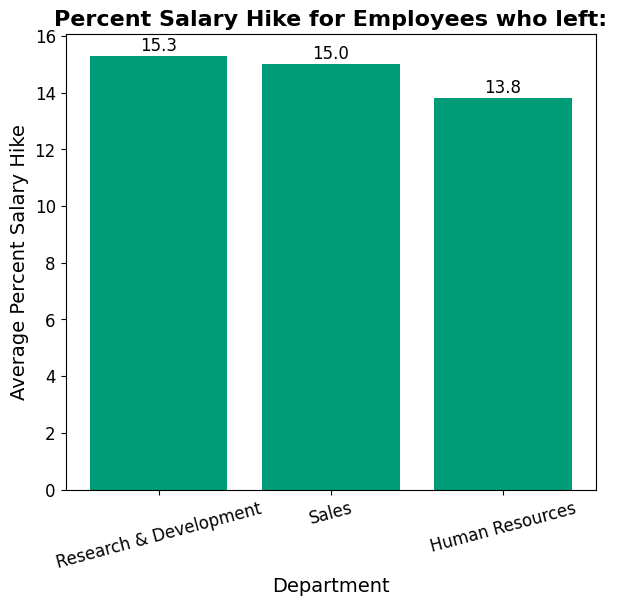

In [20]:
# Bar chart of average percent salary hike by department for employees who left

avg_salary_hike_left = (employee_attrition[employee_attrition['Attrition'] == 'Yes']
                        .groupby('Department')['PercentSalaryHike'].mean().round(1))

sorted_avg_salary_hike_left = avg_salary_hike_left.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(6, 6))
bars = ax.bar(sorted_avg_salary_hike_left.index, sorted_avg_salary_hike_left.values, color='#FF6F61')

ax.set_title("Percent Salary Hike for Employees who left:", fontsize=16, fontweight='bold')
ax.set_xlabel('Department', fontsize=14)
ax.set_ylabel('Average Percent Salary Hike', fontsize=14)
ax.bar_label(bars, fmt='%.1f', padding=1, fontsize=12)
plt.xticks(rotation=15, ha='center', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout(pad=0.5)
# Changed the bar color to a different color for distinction (e.g., '#009B77')
bars = ax.bar(sorted_avg_salary_hike_left.index, sorted_avg_salary_hike_left.values, color='#009B77')
plt.show()


**Employees Years at Company by Job Role:**

In [21]:
(employee_attrition[employee_attrition['Attrition'] == 'Yes']
.groupby('JobRole')['YearsAtCompany'].mean().round(1))

JobRole
Healthcare Representative    10.9
Human Resources               4.2
Laboratory Technician         3.2
Manager                      15.6
Manufacturing Director        8.7
Research Director            26.5
Research Scientist            4.3
Sales Executive               6.7
Sales Representative          2.1
Name: YearsAtCompany, dtype: float64

 **Bar Chart of the average Years at Company by Job Role (Employees Who Left)**

This chart shows the average tenure for departed employees by job role.



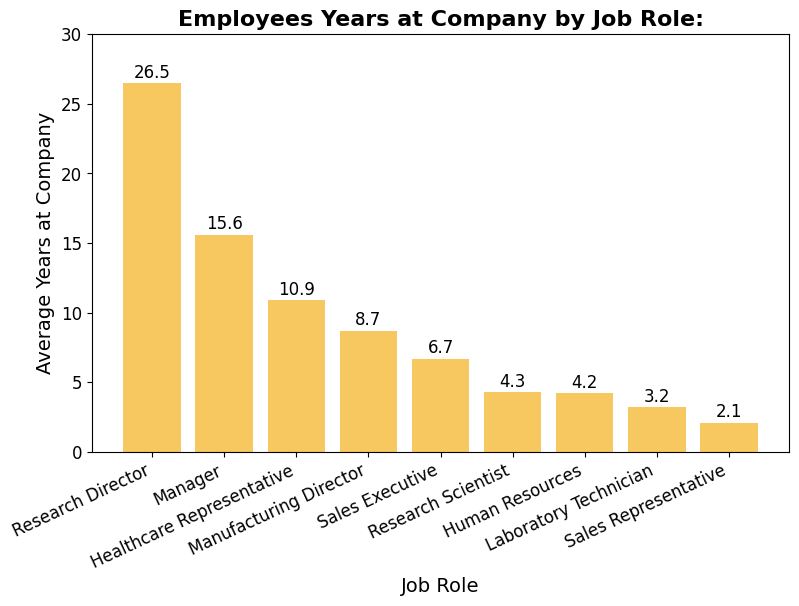

In [46]:
# Bar chart of average years at company by job role for employees who left

avg_years_left_by_job = (
    employee_attrition[employee_attrition['Attrition'] == 'Yes']
    .groupby('JobRole')['YearsAtCompany']
    .mean()
    .round(1)
)

sorted_avg_years_left_by_job = avg_years_left_by_job.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(sorted_avg_years_left_by_job.index, sorted_avg_years_left_by_job.values, color='#F6C85F')
ax.set_title('Employees Years at Company by Job Role:', fontsize=16, fontweight='bold')
ax.set_xlabel('Job Role', fontsize=14)
ax.set_ylabel('Average Years at Company', fontsize=14)
ax.bar_label(bars, fmt='%.1f', padding=1, fontsize=12)
plt.xticks(rotation=25, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout(pad=0.5)
ax.set_ylim(0, 30)
plt.show()

In [23]:
(employee_attrition[employee_attrition['Attrition'] == 'Yes']
.groupby('JobRole')['YearsAtCompany'].mean().round(1))

JobRole
Healthcare Representative    10.9
Human Resources               4.2
Laboratory Technician         3.2
Manager                      15.6
Manufacturing Director        8.7
Research Director            26.5
Research Scientist            4.3
Sales Executive               6.7
Sales Representative          2.1
Name: YearsAtCompany, dtype: float64

### **2nd KPI: Compensation and Benefits Analysis**

 **KPI: Compensation and Benefits Analysis** 

Compensation and benefits play a key role in employee satisfaction and retention. 

Analyzing pay levels, incentives, and benefits in relation to attrition reveals important patterns and helps identify areas for improvement. 

This KPI is crucial for guiding fair compensation strategies to reduce employee turnover.

**Average monthly income by department for employees who have left:**

In [24]:
#average monthly income by department of employees who have left the company:
(employee_attrition[employee_attrition['Attrition'] == 'Yes']
.groupby('Department')['MonthlyIncome'].mean().round(1))

Department
Human Resources           3715.8
Research & Development    4108.1
Sales                     5908.5
Name: MonthlyIncome, dtype: float64

**Average monthly income by department for employees who have stayed in the company:**


In [25]:
#average monthly income by department of employees who have stayed in the company:
employee_attrition[employee_attrition['Attrition'] == 'No'].groupby('Department')['MonthlyIncome'].mean().round(1)

Department
Human Resources           7346.0
Research & Development    6630.3
Sales                     7232.2
Name: MonthlyIncome, dtype: float64

**Bar Chart displaying the average Monthly Income by Department (Attrition Analysis)**

This chart compares the average monthly income across departments for employees who have left the company versus those who have stayed, revealing compensation differences that may relate to turnover.


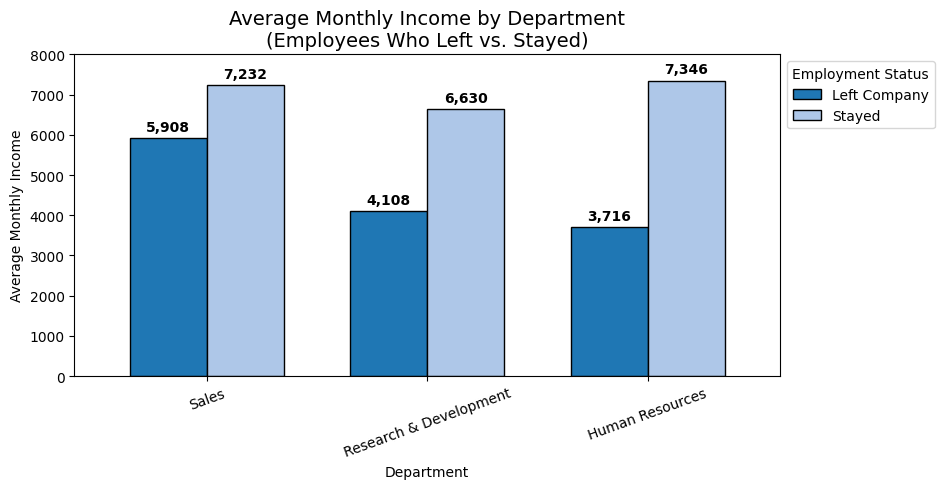

In [51]:
import matplotlib.pyplot as plt

# Calculate average monthly income by department for employees who left
left_income = (
    employee_attrition[employee_attrition['Attrition'] == 'Yes']
    .groupby('Department')['MonthlyIncome']
    .mean()
    .round(1)
    .sort_values(ascending=False)
)

# Calculate average monthly income by department for employees who stayed
stayed_income = (
    employee_attrition[employee_attrition['Attrition'] == 'No']
    .groupby('Department')['MonthlyIncome']
    .mean()
    .round(1)
    .sort_values(ascending=False)
)

# Create DataFrame for easy plotting
income_df = (
    pd.DataFrame({
        'Left Company': left_income,
        'Stayed': stayed_income
    })
    .sort_values('Left Company', ascending=False)
)

# Plot using appropriate tones of blue and orange
fig, ax = plt.subplots(figsize=(8,5))
income_df.plot(
    kind='bar',
    color=['#1f77b4', '#aec7e8'], # blue tones
    width=0.7,
    ax=ax,
    edgecolor='black'
)
ax.set_title('Average Monthly Income by Department\n(Employees Who Left vs. Stayed)', fontsize=14)
ax.set_ylabel('Average Monthly Income')
ax.set_xlabel('Department')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=20)
plt.legend(title='Employment Status')
plt.tight_layout()
# Display the numbers (value labels) on top of each bar for both series
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():,.0f}',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom',
        fontsize=10, fontweight='bold',
        xytext=(0, 3), textcoords='offset points'
    )
# Move the legend to a location where it won't overlap with the bars
# For vertical bars, "upper left" with bbox_to_anchor outside the axes works well
plt.legend(title='Employment Status', loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Remove the grid before showing
ax.grid(False)
ax.set_ylim(0, 8000)
plt.show()



**Salary & Attrition Relationship:**


In [27]:
#Analyze the relationship between salary levels and attrition rates:
# Calculate the correlation between JobLevel and Attrition (convert Attrition to numeric for correlation)
correlation = (employee_attrition['JobLevel']
.corr(employee_attrition['Attrition']
.apply(lambda x: 1 if x == 'Yes' else 0)).round(1))
print("Correlation between JobLevel and Attrition:", correlation)

#the correlation is negative and weak

Correlation between JobLevel and Attrition: -0.2


In [28]:
# Analyze the impact of stock options on attrition:
correlation_2 = (employee_attrition['StockOptionLevel']
.corr(employee_attrition['Attrition']
.apply(lambda x: 1 if x == 'Yes' else 0)).round(1))
print("Correlation between StockOptionLevel and Attrition:", correlation_2)

Correlation between StockOptionLevel and Attrition: -0.1


In [29]:
# Analyze the impact of salary hikes on attrition:
correlation_3 = (employee_attrition['PercentSalaryHike']
.corr(employee_attrition['Attrition']
.apply(lambda x: 1 if x == 'Yes' else 0)).round(1))
print("Correlation between PercentSalaryHike and Attrition:", correlation_3)

Correlation between PercentSalaryHike and Attrition: -0.0


### **3rd KPI: Work-Life Balance and Satisfaction:**

Work-life balance indicates how well employees manage work and personal life demands.

It is important because higher work-life balance often leads to higher retention and job satisfaction.



**Work-Life Balance vs. Attrition**

Analyze how attrition rates vary by employees' work-life balance scores.



In [30]:
# Display the attrition percentage for each level of WorkLifeBalance
# This Series shows, for each unique value of WorkLifeBalance, the percentage of employees who have left the company ("Attrition == 'Yes'")
# The data is grouped by WorkLifeBalance and the percentage is already calculated in the previous code cell

attrition_wlb = (
   employee_attrition.groupby(['WorkLifeBalance'])[['Attrition']]
    .apply(lambda x: (x.eq('Yes').sum() / len(x)) * 100)
    .round(2)
)
attrition_wlb

,Attrition
WorkLifeBalance,
1,31.25
2,16.86
3,14.22
4,17.65


WorkLife Balance rate by all of the employees in the comapny:

In [31]:
#total employees at each score:
employee_attrition.groupby('WorkLifeBalance')[['Attrition']].count()

,Attrition
WorkLifeBalance,
1,80
2,344
3,893
4,153


WorkLife Balnace rate by employees who left:

In [32]:
#employess who left at a given work-life balance score:
(employee_attrition[employee_attrition['Attrition'] == 'Yes']
.groupby('WorkLifeBalance')[['Attrition']].count())

,Attrition
WorkLifeBalance,
1,25
2,58
3,127
4,27


In [33]:
#attrition rate by work-life balance:
((employee_attrition[employee_attrition['Attrition'] == 'Yes']
.groupby(['WorkLifeBalance'])['Attrition']
.count())/(employee_attrition.groupby(['WorkLifeBalance'])['Attrition']
.count())*100).round(2)

# The previous calculations show the count of total employees (cell above),
# the number of employees who left ('Yes' for Attrition), and the percentage of attrition for each WorkLifeBalance score.
# This helps us see whether better work-life balance correlates with lower attrition rates.
# Generally, we observe that employees with higher WorkLifeBalance scores tend to have lower attrition percentages.

WorkLifeBalance
1    31.25
2    16.86
3    14.22
4    17.65
Name: Attrition, dtype: float64

In [34]:
# employess who stayed at a given work-life balance score:
(employee_attrition[employee_attrition['Attrition'] == 'No']
.groupby('WorkLifeBalance')[['Attrition']].count())

,Attrition
WorkLifeBalance,
1,55
2,286
3,766
4,126


In [35]:
employee_attrition.groupby('Attrition')[['JobSatisfaction','WorkLifeBalance']].mean().round(2)

,JobSatisfaction,WorkLifeBalance
Attrition,,
No,2.78,2.78
Yes,2.47,2.66


In [36]:
# Assess environmental and relationship satisfaction to understand their impact on retention
(employee_attrition.groupby('Attrition')[['EnvironmentSatisfaction','RelationshipSatisfaction']]
.mean().round(2))

,EnvironmentSatisfaction,RelationshipSatisfaction
Attrition,,
No,2.77,2.73
Yes,2.46,2.60


In [37]:
#attrition rate by EnvironmentSatisfaction:
((employee_attrition[employee_attrition['Attrition'] == 'Yes']
.groupby(['EnvironmentSatisfaction'])['Attrition']
.count())/(employee_attrition.groupby(['EnvironmentSatisfaction'])['Attrition']
.count())*100).round(2)

EnvironmentSatisfaction
1    25.35
2    14.98
3    13.69
4    13.45
Name: Attrition, dtype: float64

In [38]:
#attrition rate by RelationshipSatisfaction:
((employee_attrition[employee_attrition['Attrition'] == 'Yes']
.groupby(['RelationshipSatisfaction'])['Attrition']
.count())/(employee_attrition.groupby(['RelationshipSatisfaction'])['Attrition']
.count())*100).round(2)

RelationshipSatisfaction
1    20.65
2    14.85
3    15.47
4    14.81
Name: Attrition, dtype: float64

The next graphs show attrition rates by WorkLifeBalance, EnvironmentSatisfaction, and RelationshipSatisfaction, and a comparison of average scores between employees who stayed and those who left:




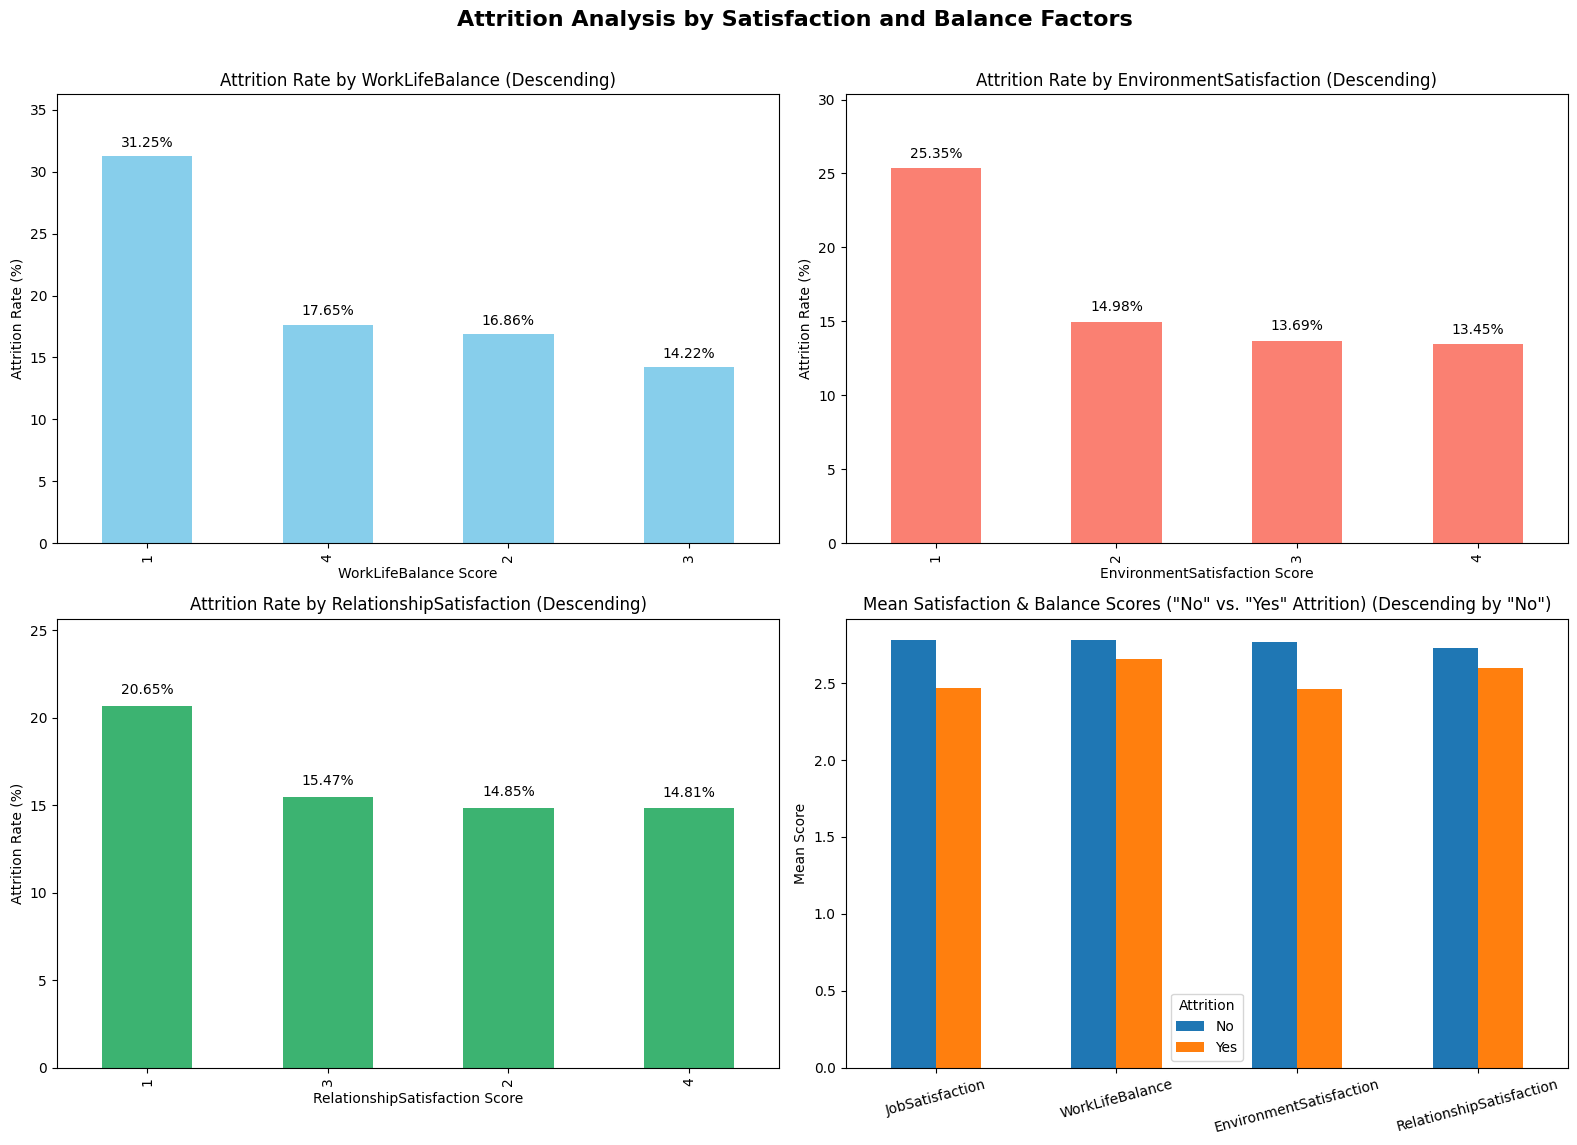

In [58]:
import matplotlib.pyplot as plt

# Prepare a DataFrame with WorkLifeBalance and EnvironmentSatisfaction attrition rates
wlb_attrition_rate = (
    (employee_attrition[employee_attrition['Attrition'] == 'Yes']
     .groupby(['WorkLifeBalance'])['Attrition']
     .count()) / (employee_attrition.groupby(['WorkLifeBalance'])['Attrition'].count()) * 100
).round(2)

envsat_attrition_rate = (
    (employee_attrition[employee_attrition['Attrition'] == 'Yes']
     .groupby(['EnvironmentSatisfaction'])['Attrition']
     .count()) / (employee_attrition.groupby(['EnvironmentSatisfaction'])['Attrition'].count()) * 100
).round(2)

relsat_attrition_rate = (
    (employee_attrition[employee_attrition['Attrition'] == 'Yes']
     .groupby(['RelationshipSatisfaction'])['Attrition']
     .count()) / (employee_attrition.groupby(['RelationshipSatisfaction'])['Attrition'].count()) * 100
).round(2)

job_attrition_stats = employee_attrition.groupby('Attrition')[['JobSatisfaction','WorkLifeBalance','EnvironmentSatisfaction','RelationshipSatisfaction']].mean().round(2).T

# Set up the subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Attrition Analysis by Satisfaction and Balance Factors", fontsize=16, fontweight='bold')


# 1. WorkLifeBalance Attrition Rate (Descending)
ax = axs[0, 0]
wlb_attrition_rate_sorted = wlb_attrition_rate.sort_values(ascending=False)
wlb_attrition_rate_sorted.plot(kind='bar', ax=ax, color='skyblue')
ax.set_title('Attrition Rate by WorkLifeBalance (Descending)')
ax.set_xlabel('WorkLifeBalance Score')
ax.set_ylabel('Attrition Rate (%)')
ax.set_ylim(0, wlb_attrition_rate_sorted.max() + 5)
for i, v in enumerate(wlb_attrition_rate_sorted):
    ax.text(i, v+0.5, f"{v:.2f}%", ha='center', va='bottom')

# 2. EnvironmentSatisfaction Attrition Rate (Descending)
ax = axs[0, 1]
envsat_attrition_rate_sorted = envsat_attrition_rate.sort_values(ascending=False)
envsat_attrition_rate_sorted.plot(kind='bar', ax=ax, color='salmon')
ax.set_title('Attrition Rate by EnvironmentSatisfaction (Descending)')
ax.set_xlabel('EnvironmentSatisfaction Score')
ax.set_ylabel('Attrition Rate (%)')
ax.set_ylim(0, envsat_attrition_rate_sorted.max() + 5)
for i, v in enumerate(envsat_attrition_rate_sorted):
    ax.text(i, v+0.5, f"{v:.2f}%", ha='center', va='bottom')

# 3. RelationshipSatisfaction Attrition Rate (Descending)
ax = axs[1, 0]
relsat_attrition_rate_sorted = relsat_attrition_rate.sort_values(ascending=False)
relsat_attrition_rate_sorted.plot(kind='bar', ax=ax, color='mediumseagreen')
ax.set_title('Attrition Rate by RelationshipSatisfaction (Descending)')
ax.set_xlabel('RelationshipSatisfaction Score')
ax.set_ylabel('Attrition Rate (%)')
ax.set_ylim(0, relsat_attrition_rate_sorted.max() + 5)
for i, v in enumerate(relsat_attrition_rate_sorted):
    ax.text(i, v+0.5, f"{v:.2f}%", ha='center', va='bottom')

# 4. Comparison of mean satisfaction/balance by attrition (descending by 'No' mean)
# We'll sort by the "No" column value descending
job_attrition_stats_sorted = job_attrition_stats.sort_values(by="No", ascending=False)
ax = axs[1, 1]
job_attrition_stats_sorted.plot(kind='bar', ax=ax)
ax.set_title('Mean Satisfaction & Balance Scores ("No" vs. "Yes" Attrition) (Descending by "No")')
ax.set_ylabel('Mean Score')
ax.set_xticklabels(job_attrition_stats_sorted.index, rotation=15)
ax.legend(title="Attrition", loc='best')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()



In [40]:
# Assess environmental and relationship satisfaction to understand their impact on retention
(employee_attrition.groupby('Attrition')[['EnvironmentSatisfaction','RelationshipSatisfaction']]
.agg(['mean', 'median', 'std']).round(2))

EnvironmentSatisfaction              RelationshipSatisfaction  \
                             mean median   std                     mean   
Attrition                                                                 
No                           2.77    3.0  1.07                     2.73   
Yes                          2.46    3.0  1.17                     2.60   

                        
          median   std  
Attrition               
No           3.0  1.07  
Yes          3.0  1.13

In [41]:
# employess who stayed at a given EnvironmentSatisfaction score:
(employee_attrition[employee_attrition['Attrition'] == 'No']
.groupby(['EnvironmentSatisfaction'])[['Attrition']]
.count())

,Attrition
EnvironmentSatisfaction,
1,212
2,244
3,391
4,386


In [42]:
# total employees at each score:
(employee_attrition.groupby(['EnvironmentSatisfaction'])[['Attrition']]
.count())

,Attrition
EnvironmentSatisfaction,
1,284
2,287
3,453
4,446


In [43]:
# employess who left at a given EnvironmentSatisfaction score:
(employee_attrition[employee_attrition['Attrition'] == 'Yes']
.groupby(['EnvironmentSatisfaction'])[['Attrition']]
.count())

,Attrition
EnvironmentSatisfaction,
1,72
2,43
3,62
4,60


## 4. Career Growth and Job Stability

In [44]:
employee_attrition.groupby('Attrition')['YearsSinceLastPromotion'].sum()

Attrition
No     2755
Yes     461
Name: YearsSinceLastPromotion, dtype: int64

In [45]:
employee_attrition.groupby('Attrition')['YearsSinceLastPromotion'].sum()

Attrition
No     2755
Yes     461
Name: YearsSinceLastPromotion, dtype: int64